## Single-point calculation of Polyphenylene Ethynylene Dendrimer (PPE)

A single-point molecular dynamics simulation was performed following the procedure from:
* <i>J. Chem. Theory Comput. 2020, 16, 5771-5783.</i> 
This simulation was run in the absence of a solvent and used the COSMO potential.

Important parameters include:
* `grms_tol` = 0.001
* `verbosity` = 5
* `natoms` = 48
* `rnd_seed` = 194345
* `bo_dynamics_flag` = 1
* `exc_state_init` = 0
* `n_exc_states_propagate` = 11
* `n_class_steps` = 0
* `n_quant_steps` = 4
* `decoher_type` = 2
* `dotrivial` = 1
* `quant_step_reduction_factor` = 2.5d-2
* `verbosity` = 3 (in the outpu & log parameters section)

### Setup instructions
1. To set up the simulation, I created a directory named `singlepoint` with a file named `header` in it (see file named header for an example).

2. Then I used `python getexcited.py` to prepare input files for single-point calculations with [651,1300,650] and allocating 130 single-point calculations to each folder. 

3. <b>Step 2</b> generated five folders: `NEXMD1`, `NEXMD2`, `NEXMD3`, `NEXMD4`, and `NEXMD5`. In each of these folders, there are 130 trajectories with input.ceon files that need to be executed for single-point calculations. I did so with the following Linux commands:

* for word in \$(cat dirlist);

* \>do
* \>cd ./$word
* \>nexmd.exe > md.out
* \>cd ..
* \>done

4. Then from the master directory, I selected to generated an optical spectrum from single-point calculations with the following:

* 2
* singlepoint
* 0 (Gaussian spectral lineshape)
* 0.36 (FWHM)

5. <b>Step 4</b> generated a file named `ceo_gauss.out`. The first column of this file is energy in eV; the last column is the total spectrum; the columns inbetween give the spectrum of each excited state in order from S$_1$ to S$_N$




In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
with_solvent, without_solvent = "ceo_gauss.out", "ceo_gauss_vac.out"
x, *y = np.loadtxt(with_solvent, delimiter=' ', unpack=True)
u, *v = np.loadtxt(without_solvent, delimiter=' ', unpack=True)

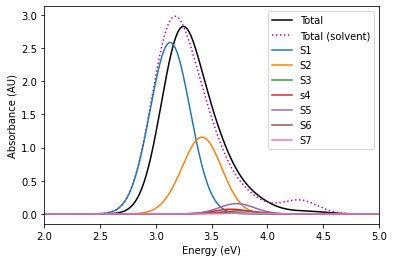

In [7]:
# plot the data
plt.plot(u, v[11],"k-",label="Total")
plt.plot(x, y[11], "m:", label="Total (solvent)")
plt.plot(x, y[0],label="S1")  
plt.plot(x, y[1],label="S2")  
plt.plot(x, y[2],label="S3") 
plt.plot(x, y[3],label="s4")
plt.plot(x, y[4],label="S5")
plt.plot(x, y[5],label="S6")
plt.plot(x, y[6],label="S7")
#plt.plot(x, y[7],label="S8")
#plt.plot(x, y[8],label="S9")
#plt.plot(x, y[9],label="S10")
#plt.plot(x, y[10],label="S11")

plt.xlabel("Energy (eV)")
plt.xlim([2.0, 5.0])
plt.ylabel("Absorbance (AU)")
plt.legend()
plt.show()

#print(time.shape)

In [8]:
print(y[6].max())
print(x[y[6].argmax()])

0.088703
3.83744
